<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 10<a id='top'></a>

- <a href='#section1'>10.1 Dynamic Mode Decomposition on a toy dataset</a>
- <a href='#section2'>10.2 Advanced use of Dynamic Mode Decomposition </a>


## 10.1 Dynamic Mode Decomposition on a toy dataset
<a id='section1'></a>

<p>In this tutorial we will show the typical use case, applying the dynamic mode decomposition on the snapshots collected during the evolution of a generic system. We present a very simple system since the main purpose of this tutorial is to show the capabilities of the algorithm and the package interface.</p>

<p>First of all we import the DMD class from the pydmd package, we set matplotlib for the notebook and we import numpy.</p>

In [42]:
# import sys
# !{sys.executable} -m pip install pydmd

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pydmd import DMD
from pydmd.plotter import plot_eigs

We create the input data by summing two different functions:

$f_1(x,t) = \text{sech}(x+3)\exp(i2.3t)$

$f_2(x,t) = 2\text{sech}(x)\tanh(x)\exp(i2.8t)$

In [44]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)

x = np.linspace(-5, 5, 128)
t = np.linspace(0, 4*np.pi, 256)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2


<p>The plots below represent these functions and the dataset.</p>

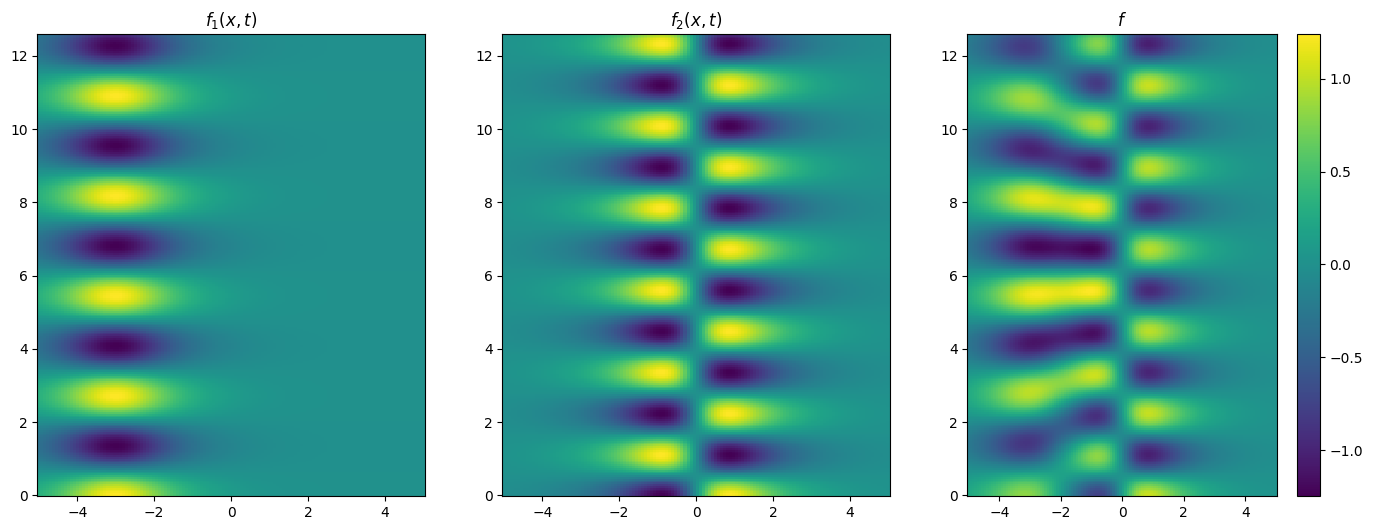

In [45]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$', '$f$']
data = [X1, X2, X]

fig = plt.figure(figsize=(17,6))
for n, title, d in zip(range(131,134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()


<p>Now we have the temporal snapshots in the input matrix rows: we can easily create a new DMD instance and exploit it in order to compute the decomposition on the data. Since the snapshots must be arranged by columns, in this case we need to transpose the matrix.</p>

In [46]:
dmd = DMD(svd_rank=2)
dmd.fit(X.T) # since snapshots must be arranged in columns. 

c:\Python310\lib\site-packages\pydmd\snapshots.py:72: UserWarning: Input data condition number 3.9651129834893046e+18. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


<p>The <code>dmd</code> object contains the principal information about the decomposition:</p>
<ul>
<li>the attribute <code>modes</code> is a 2D numpy array where the columns are the low-rank structures individuated; </li>
<li>the attribute <code>dynamics</code> is a 2D numpy array where the rows refer to the time evolution of each mode;</li>
<li>the attribute <code>eigs</code> refers to the eigenvalues of the low dimensional operator;</li>
<li>the attribute <code>reconstructed_data</code> refers to the approximated system evolution.</li>
</ul>
<p>Moreover, some helpful methods for the graphical representation are provided.</p>

## Shape of original data

In [47]:
print(X.shape)

# The shape of the original data is up to our choice of putting the cutting point at the place we want. 
# 256 rows: 256 time steps
# 128 columns: 128 spatial points

(256, 128)


## Modes 

- This attribute represents the spatial modes of the data. Each mode captures a specificv dynamic behavior of the system. 
- The modes are essentially the eigenvectors of teh low-rank approximation of the system's dynamics. 

Mathematics background:
- We have $X' = AX$. And considering matrix matrix multiplicatio, $A$ is spanning $X$ with its column. So $A$ essentially corresponding to the spatial modes of the system, which reveal the spatial patterns or structures within the system that contribute to its behavior. 

In [48]:
print(dmd.modes.shape)
print(dmd.modes)

# the dimension of rows correspnding to the number of spatial points, which is 128.
# the dimension of columns correspnding to the number of rank used in DMD, which is 2.


(128, 2)
[[ 4.63123502e-03+6.90084576e-16j  5.31842995e-02-6.04097690e-16j]
 [ 5.01052401e-03+7.43739877e-16j  5.73653462e-02-6.51878148e-16j]
 [ 5.42085455e-03+8.01628077e-16j  6.18435015e-02-7.02768194e-16j]
 [ 5.86476139e-03+8.64237342e-16j  6.66316918e-02-7.57405700e-16j]
 [ 6.34498475e-03+9.29691918e-16j  7.17411768e-02-8.17102903e-16j]
 [ 6.86448654e-03+9.99890406e-16j  7.71808264e-02-8.78953351e-16j]
 [ 7.42646781e-03+1.07397894e-15j  8.29562434e-02-9.45548983e-16j]
 [ 8.03438737e-03+1.15292683e-15j  8.90687149e-02-1.01645956e-15j]
 [ 8.69198173e-03+1.23493711e-15j  9.55139855e-02-1.09111879e-15j]
 [ 9.40328635e-03+1.32169790e-15j  1.02280855e-01-1.17004433e-15j]
 [ 1.01726582e-02+1.41128763e-15j  1.09349616e-01-1.25351205e-15j]
 [ 1.10047998e-02+1.50547321e-15j  1.16690382e-01-1.34009863e-15j]
 [ 1.19047843e-02+1.60007621e-15j  1.24261372e-01-1.43019545e-15j]
 [ 1.28780821e-02+1.69813246e-15j  1.32007267e-01-1.52302131e-15j]
 [ 1.39305885e-02+1.79646527e-15j  1.39857805e-01-1.6

## Dynamics
- Dynamics represents the temporal evolution of each mode over the original time series. This is computed as the projection of the time dynamics onto the eigenvectors of the low-rank approximation. 
- Each row corresponds to a mode (eigenfunction), and each column corresponds to a time point. 

In [49]:
print(dmd.dynamics.shape)
print(dmd.dynamics)

# the dimension of columns correspnding to the number of time steps, which is 256.
# the dimension of rows correspnding to the number of rank used in DMD, which is 2.

(2, 256)
[[-5.81877563+2.60824001e-14j -5.76347019-8.00350694e-01j
  -5.59860518-1.58548728e+00j -5.32731457-2.34048485e+00j
  -4.95475541-3.05099142e+00j -4.48800979-3.70350077e+00j
  -3.93595021-4.28560914e+00j -3.30907096-4.78625106e+00j
  -2.61928857-5.19590966e+00j -1.87971531-5.50679763e+00j
  -1.10440998-5.71300520e+00j -0.30811057-5.81061251e+00j
   0.4940458 -5.79776410e+00j  1.2868107 -5.67470422e+00j
   2.05511423-5.44377216e+00j  2.78435146-5.10935777e+00j
   3.4606601 -4.67781803e+00j  4.07118399-4.15735622e+00j
   4.60431751-3.55786595e+00j  5.04992614-2.89074312e+00j
   5.39953919-2.16866927e+00j  5.64651074-1.40537052e+00j
   5.78614604-6.15356655e-01j  5.81579072+1.86354713e-01j
   5.73488126+9.84523608e-01j  5.54495569+1.76397739e+00j
   5.24962435+2.50989919e+00j  4.85450131+3.20810955e+00j
   4.36709756+3.84533597e+00j  3.79667832+4.40946522e+00j
   3.15408686+4.88977360e+00j  2.4515384 +5.27713078e+00j
   1.70238789+5.56417337e+00j  0.92087618+5.74544488e+00j
   0.

## Eigenvalues 
- Eigenvalues of the low-rank approximation
- These eigenvalues describe the growth or decay rate and frequency of the corresponding modes. 
- Eigs are complex numbers, and their magnitudes and angles have specific physical interpretations.

In [50]:
print(dmd.eigs.shape)
print(dmd.eigs)

# 2 eigenvalues correspnding to the number of rank used in DMD, which is 2.

(2,)
[0.99049535+0.13754624j 0.99358347+0.11310121j]


## Reconstructed data 
- This is an approximation of the original databased on the reduced-rank DMD model. 
- It is computed by multiplying the DMD modes by the DMD dynamics and adding the mean of the original data. 

In [51]:
print(dmd.reconstructed_data.shape)
print(dmd.reconstructed_data)


(128, 256)
[[ 0.23885411-1.53507418e-18j  0.23740472+2.63559407e-02j
   0.23307355+5.23965471e-02j ... -0.21935838-9.46074987e-02j
  -0.20755608-1.18220587e-01j -0.19323704-1.40394924e-01j]
 [ 0.25754297+7.56306209e-19j  0.25598047+2.84157232e-02j
   0.25131132+5.64915536e-02j ... -0.23652003-1.02014463e-01j
  -0.2237949 -1.27472745e-01j -0.20835664-1.51379960e-01j]
 [ 0.27753608+2.30063646e-18j  0.27585267+3.06186028e-02j
   0.2708222 +6.08710716e-02j ... -0.25487888-1.09939561e-01j
  -0.24116666-1.37371163e-01j -0.22453141-1.63131617e-01j]
 ...
 [ 0.03232809+7.16435209e-19j  0.03202325+4.42740948e-03j
   0.03111449+8.77120558e-03j ... -0.03032774-1.11925831e-02j
  -0.02850972-1.52409451e-02j -0.02615398-1.90019763e-02j]
 [ 0.029881  -2.03717744e-19j  0.02959924+4.09227534e-03j
   0.02875926+8.10726644e-03j ... -0.02803207-1.03453550e-02j
  -0.02635167-1.40872750e-02j -0.02417424-1.75636138e-02j]
 [ 0.02761904+1.14549559e-18j  0.02735861+3.78249461e-03j
   0.02658222+7.49355529e-03j .

Thanks to the eigenvalues, we can check if the modes are stable or not: if an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively. From the following plot, we can note that the two modes are stable.

c:\Python310\lib\site-packages\pydmd\plotter.py:191: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(


Eigenvalue (0.9904953470777577+0.13754623737970018j): distance from unit circle 2.220446049250313e-16
Eigenvalue (0.9935834726096828+0.11310120669950198j): distance from unit circle 1.1102230246251565e-16


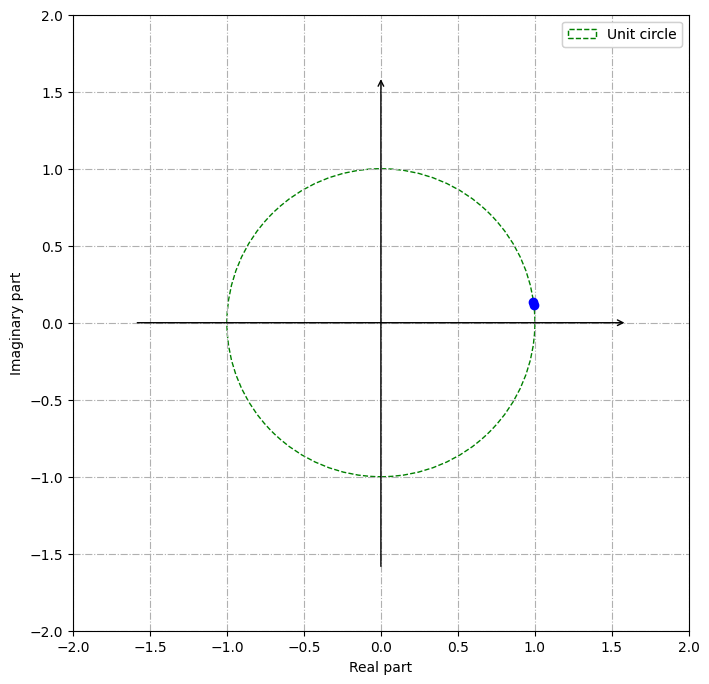

In [52]:
for eig in dmd.eigs:
    print(
        "Eigenvalue {}: distance from unit circle {}".format(
            eig, np.abs(np.sqrt(eig.imag**2 + eig.real**2) - 1)
        )
    )

plot_eigs(dmd, show_axes=True, show_unit_circle=True)

<p>We can plot the modes and the dynamics:</p>

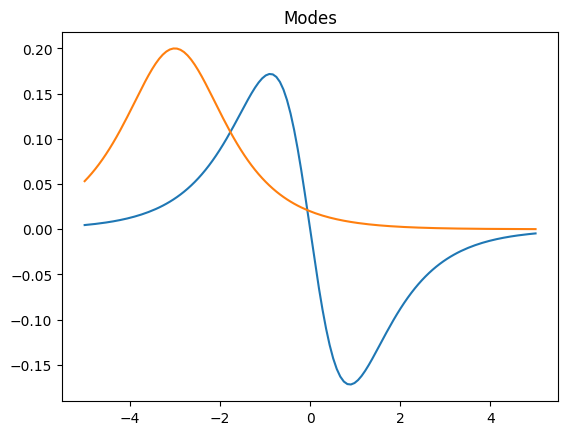

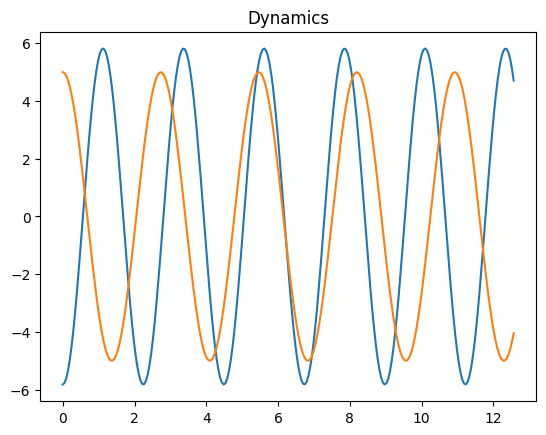

In [53]:
for mode in dmd.modes.T:
    plt.plot(x, mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()


<p>Finally, we can reconstruct the original dataset as the product of modes and dynamics. We plot the evolution of each mode to emphasize their similarity with the input functions and we plot the reconstructed data.</p>

There are 2 expression to the DMD prediction?

Method 1: 
- $A = T \Lambda T^{-1}$ and $x(t_0 + t) = Te^{\Lambda t}T^{-1}x(t_0)$.

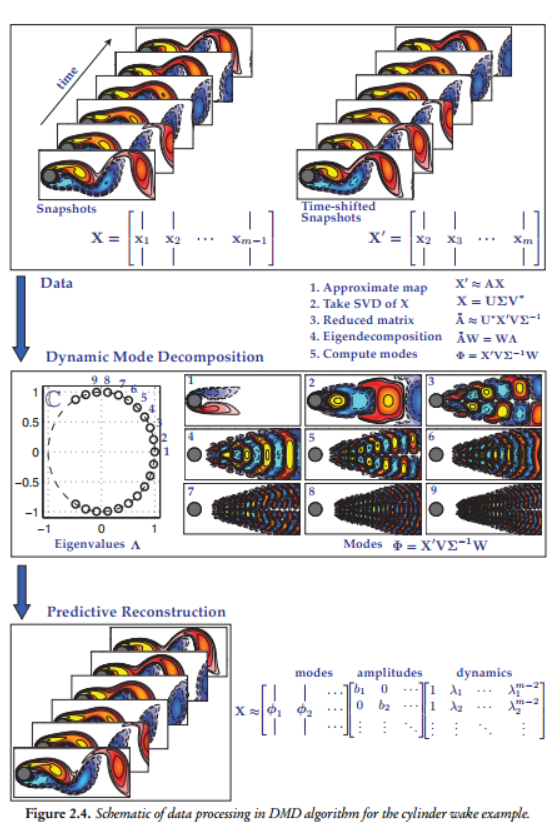

Q1: There is "amplitudes" matrix in the reference book expression. 

Q2: is there anyways to know the maximum possible value of rank? Yes, max(rank) = min(m,n)

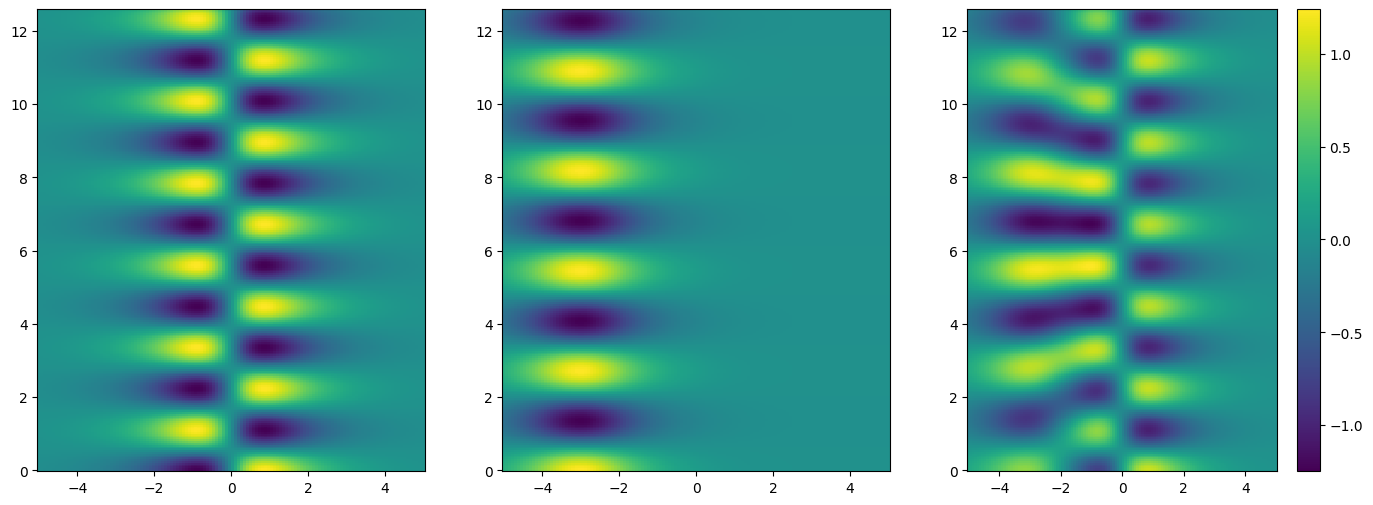

In [54]:
fig = plt.figure(figsize=(17,6))

for n, mode, dynamic in zip(range(131, 133), dmd.modes.T, dmd.dynamics):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, (mode.reshape(-1, 1).dot(dynamic.reshape(1, -1))).real.T)
    
plt.subplot(133)
plt.pcolor(xgrid, tgrid, dmd.reconstructed_data.T.real)
plt.colorbar()

plt.show()


<p>We can also plot the absolute error between the approximated data and the original one.</p>

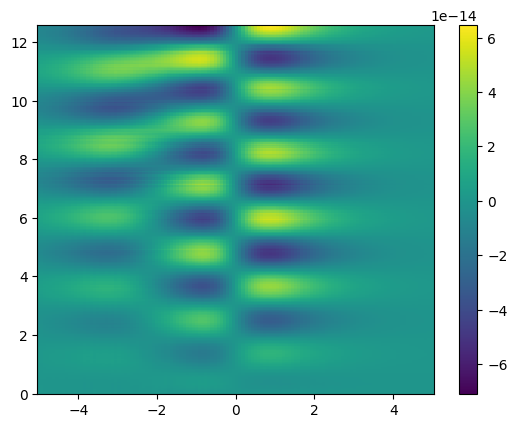

In [55]:
plt.pcolor(xgrid, tgrid, (X-dmd.reconstructed_data.T).real)
fig = plt.colorbar()


In [56]:
np.linalg.norm((X1 + X2-dmd.reconstructed_data.T))/np.linalg.norm(X)

3.5278963773173566e-14

<p>The reconstructed system looks almost equal to the original one: the dynamic mode decomposition made possible the identification of the meaningful structures and the complete reconstruction of the system using only the collected snapshots.</p>

## 10.2 Advanced use of Dynamic Mode Decomposition
<a id='section2'></a>

<p>In this tutorial we will show a more sophisticated application of the standard <strong>dynamic mode decomposition</strong> algorithm. In detail, we will create a 2D dataset that oscillates in time and we will focus on the parameters that allow to optimally tune this technique for the studied system.</p>

<p>First of all we import the DMD class from the pydmd package, we set matplotlib for the notebook, we import numpy and scipy, the function to show HTML videos on IPython and finally we import the animation submodule from matplotlib.</p>

In [57]:
%matplotlib inline
import numpy as np
import scipy
import scipy.integrate

from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from pydmd import DMD
import matplotlib
from pydmd.plotter import plot_modes_2D


<p>Now, we create the dataset: a hyperbolic sine with damped oscillations is obtained from the following formula:</p>

-$f(x,y,t) := \text{sech}(x) * \text{sech}(y)*1.2\text{i}^{-t}$.

<p>We take 16 equispaced snapshots.</p>
<p>Moreover, to make the input data more realistic, we add some noise.</p>

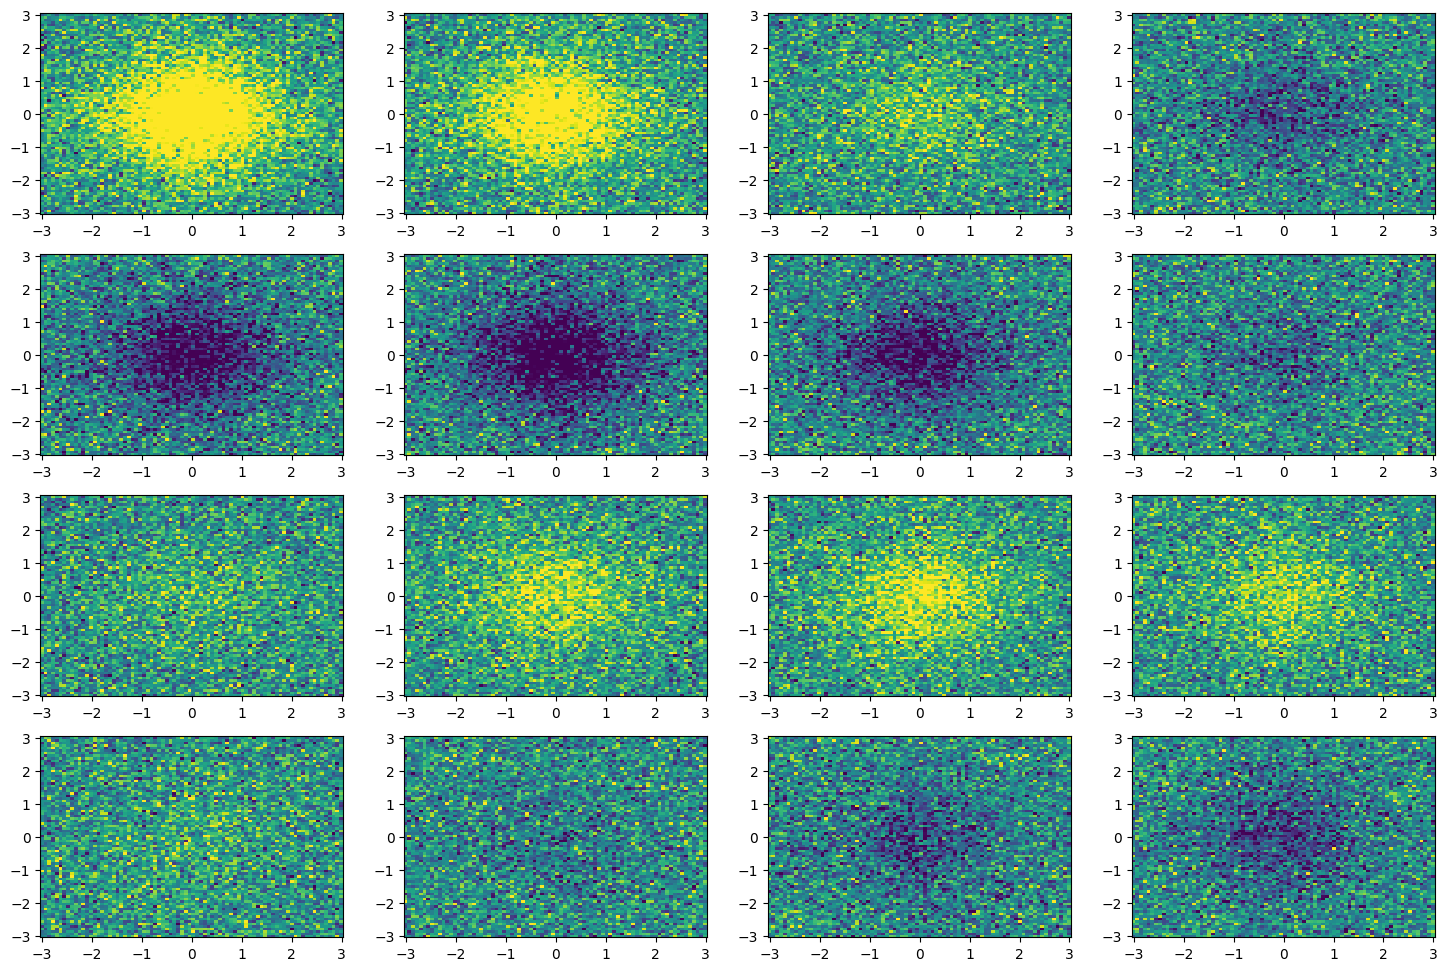

In [58]:
x1 = np.linspace(-3, 3, 80)
x2 = np.linspace(-3, 3, 80)
x1grid, x2grid = np.meshgrid(x1, x2)

time = np.linspace(0, 6, 16)

data = [2/np.cosh(x1grid)/np.cosh(x2grid)*(1.2j**-t) for t in time]
noise = [np.random.normal(0.0, 0.4, size=x1grid.shape) for t in time]

snapshots = [d+n for d,n in zip(data, noise)] #snapshot is just a 2D array that carries the pure signal with noise. 

fig = plt.figure(figsize=(18,12))
for id_subplot, snapshot in enumerate(snapshots, start=1):
    plt.subplot(4, 4, id_subplot)
    plt.pcolor(x1grid, x2grid, snapshot.real, vmin=-1, vmax=1)


<p>Alright, now it's time to apply the DMD to the collected data. First, we create a new <code>DMD</code> instance; we note there are four optional parameters:</p>
<ul>
<li><code>svd_rank</code>: since the dynamic mode decomposition relies on <em>singular value decomposition</em>, we can specify the number of the largest singular values used to approximate the input data.</li>
<li><code>tlsq_rank</code>: using the total least square, it is possible to perform a linear regression in order to remove the noise on the data; because this regression is based again on the singular value decomposition, this parameter indicates how many singular values are used.</li>
<li><code>exact</code>: boolean flag that allows to chose between the exact modes or the projected one.</li>
<li><code>opt</code>: boolean flag that allows to chose between the standard version and the optimized one.</li>
</ul>

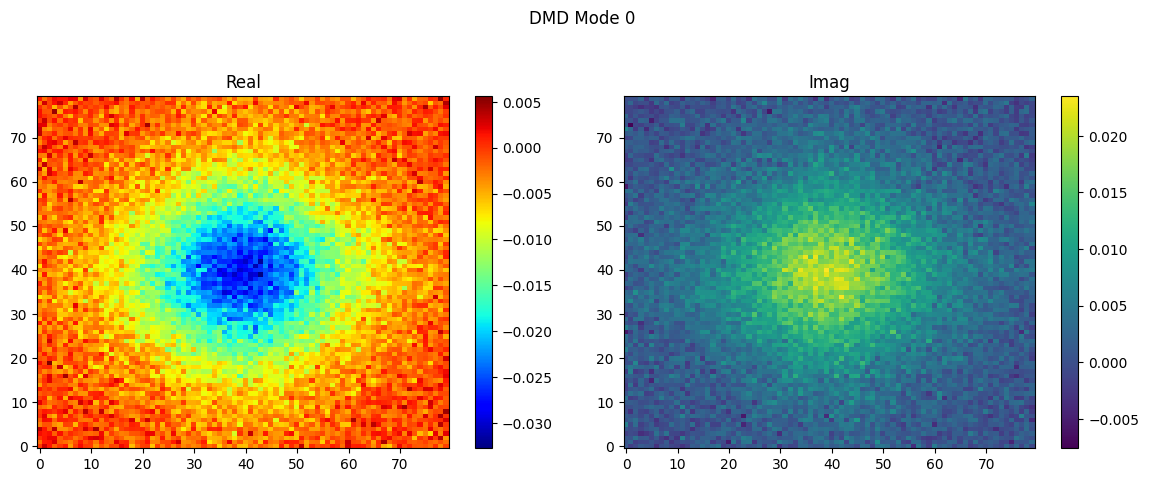

In [59]:
dmd = DMD(svd_rank=1, tlsq_rank=2, exact=True, opt=True)
dmd.fit(snapshots)
plot_modes_2D(dmd,figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

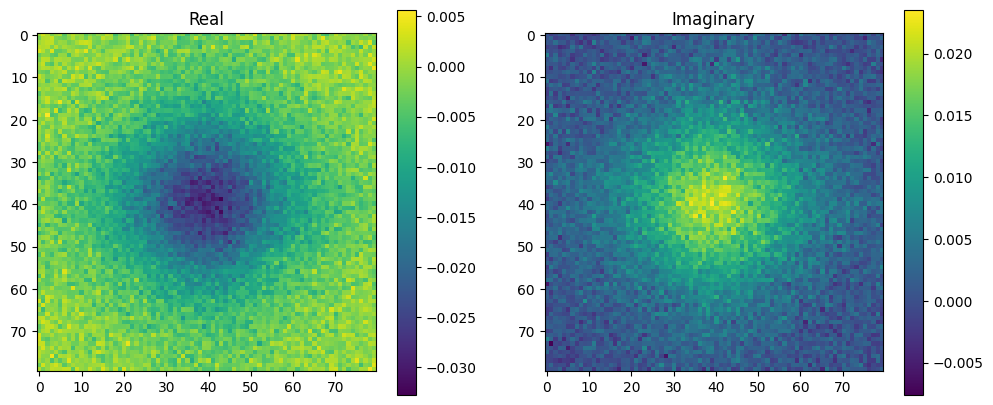

In [60]:
mode = dmd.modes
plt.figure(figsize=(12,5))
fig, ax = plt.subplots(1,2,figsize=(12,5))
img0 = ax[0].imshow(mode.real.reshape(x1grid.shape)) 
img1 = ax[1].imshow(mode.imag.reshape(x1grid.shape)) 
plt.colorbar(img0, ax=ax[0])
plt.colorbar(img1, ax=ax[1])
ax[0].set_title('Real')
ax[1].set_title('Imaginary')
plt.show()

<p>The <code>svd_rank</code> can be set to zero for an automatic selection of the truncation rank; in some cases (as this tutorial) the singular values should be examinated in order to select the proper truncation.</p>

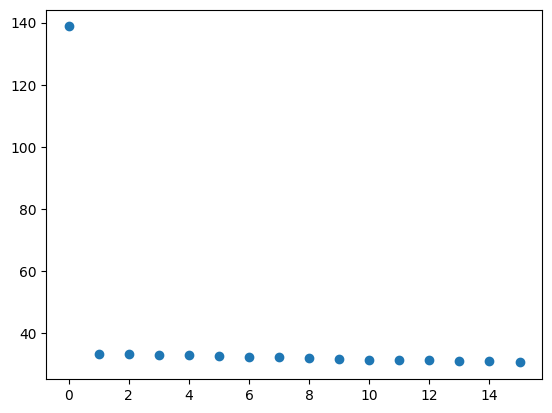

In [61]:
fig = plt.plot(scipy.linalg.svdvals(np.array([snapshot.flatten() for snapshot in snapshots]).T), 'o')


<p>We can now plot the reconstructed states from DMD: the approximated system is similar to the original one and, moreover, the noise is greatly reduced.</p>

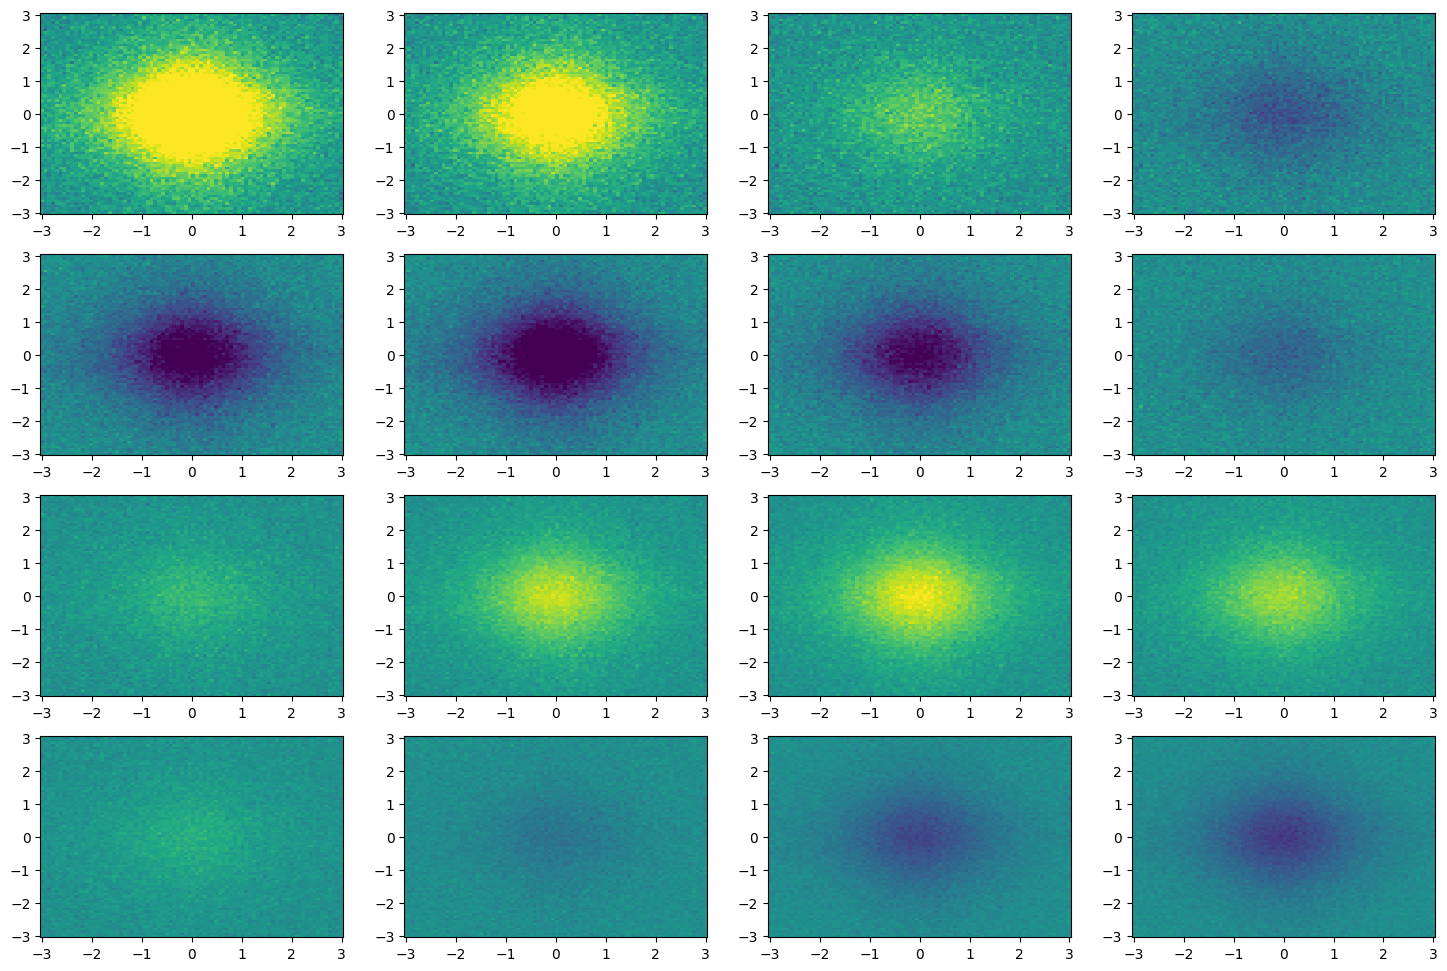

In [62]:
fig = plt.figure(figsize=(18,12))
for id_subplot, snapshot in enumerate(dmd.reconstructed_data.T, start=1):
    plt.subplot(4, 4, id_subplot)
    plt.pcolor(x1grid, x2grid, snapshot.reshape(x1grid.shape).real, vmin=-1, vmax=1)


We can also manipulate the interval between the approximated states and extend the temporal window where the data is reconstructed thanks to DMD. Let's make the DMD delta time a quarter of the original and extend the temporal window to $[0, 3t_{\text{org}}]$, where $t_{\text{org}}$ indicates the time when the last snapshot was caught.

In [63]:
print("Shape before manipulation: {}".format(dmd.reconstructed_data.shape))
dmd.dmd_time['dt'] *= .25 # reduce the original delta T by 'how many times'?
# That means for 2 consecutive snapshots, we have 3 extra snapshots
dmd.dmd_time['tend'] *= 3 # extend the scope of the time series by 'how many times'?
print("Shape after manipulation: {}".format(dmd.reconstructed_data.shape))


Shape before manipulation: (6400, 16)
Shape after manipulation: (6400, 181)


<p>Amazing, isn't it? And we remember that everything is obtained just from few noisy snapshots. For a further check about the accuracy of the reconstruction, we can plot the integral computed on the original snapshots and on the DMD states.</p>

- DMD modes: The DMD modes are given by ` Φ = X Vr Σr^(-1) W.`
- We apply double integral to aggregate the data in each snapshot, providing a simgle real number that represents the total "quantity" in the snapshot, whatever that quantity may be. 

- 

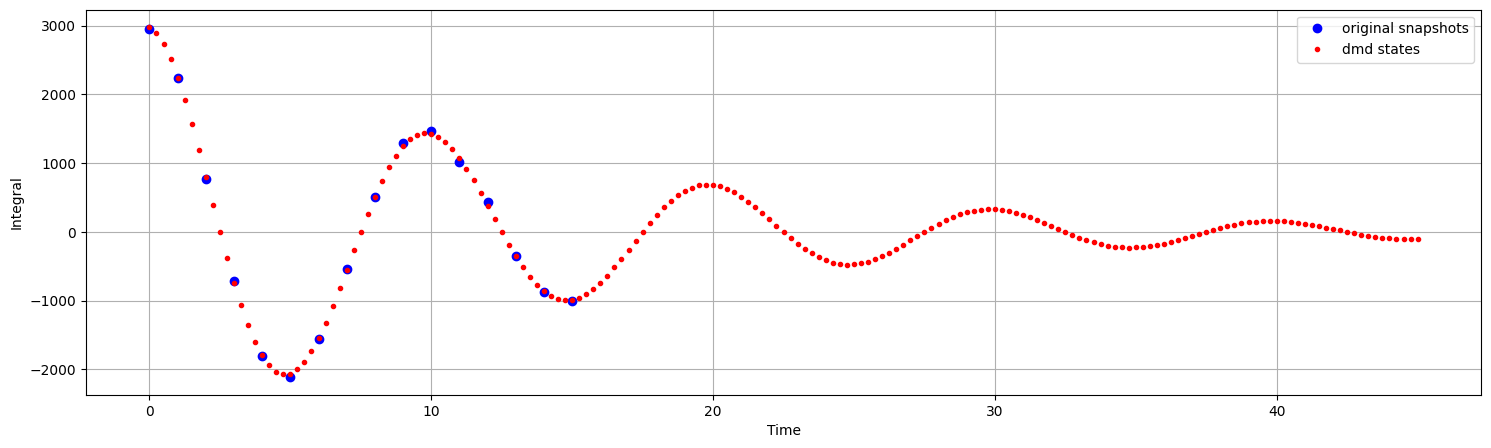

In [64]:
compute_integral = scipy.integrate.trapz
# this line assigns `trapz` functoin, which computes the integral of a function 
# using the trapezoidal rule, to the variable `compute_integral`.


# This part computes the itnegral over all snapshots). The result are saved in `original_int` and `dmd_int`.
# The double applicaton of `compute_integral` suggests the snapshot 
# is two-dimensional array, and the code is computing a double integral. 

# why we name 

# at each time, we compute an integral over the whole image area to get an overall value. 

original_int = [compute_integral(compute_integral(snapshot)).real for snapshot in snapshots]

# states are computed from DMD. delta t = 0.25 so we have 3 red dots in between blue bot. 
dmd_states = [state.reshape(x1grid.shape) for state in dmd.reconstructed_data.T]

dmd_int = [compute_integral(compute_integral(state)).real for state in dmd_states]

figure = plt.figure(figsize=(18, 5))
plt.plot(dmd.original_timesteps, original_int, 'bo', label='original snapshots')
plt.plot(dmd.dmd_timesteps, dmd_int, 'r.', label='dmd states')
plt.ylabel('Integral')
plt.xlabel('Time')
plt.grid()
leg = plt.legend()


<p>The estimation of the future evolution seems reasonable, but this still be a simple testcase: try to apply the dynamic mode decomposition on more complex systems and share with us your results!</p>